# 데이터 탐색 이해와 실무

## 일변량 시각화

#### 강의 교안
1. 범주형 일변량 시각화
    - 파이차트
    - 막대그래프
2. 연속형 일변량 시각화
      - 히스토그램
      - 커널밀도그래프
      - 박스플롯

#### 실습 데이터
- 데이터: Boston Housing Price

#### 실습 시 활용 패키지
- pandas
- numpy
- matplotlib
- seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# OpenML에서 보스턴 주택 가격 데이터셋을 로드합니다.
boston = fetch_openml(name='boston', version=1)

# 데이터와 타겟을 추출합니다.
data = boston.data
target = boston.target

# 데이터프레임 생성
X = pd.DataFrame(data, columns=boston.feature_names)
y = pd.DataFrame(target, columns=['MEDV'])

# 데이터프레임 병합
housing = pd.merge(X, y, left_index=True, right_index=True, how='inner')

# 결과 출력
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 데이터 컬럼 설명
#### 보스턴 인근 Town별 주택 가격 및 관련 정보 데이터셋
- [01] CRIM: town별 1인당 범죄율
- [02] ZN: 25,000 sq.ft.을 초과하는 거주지역 비율
- [03] INDUS: 비소매상업지역이 점유하고 있는 토지의 비율
- [04] CHAS: 찰스강 경계 위치 여부(강의 경계에 위치한 경우는 1, 아니면 0)
- [05] NOX: 10ppm당 농축 일산화질수
- [06] RM: 주택 1가구당 평균 방의 개수
- [07] AGE: 1940년 이전에 긴축된 소유주택의 비율
- [08] DIS: 보스턴 직업센터까지의 거리(가중치 반영)
- [09] RAD: 고속도로까지의 접근성 지수
- [10] TAX: $10,000당 재산세율
- [11] PTRATIO: town별 학생대비 교사 비율
- [12] B: 1000(Bk - 0.63)^2 값, Bk는 town별 흑인의 비율을 말함
- [13] LSTAT: 하위계층의 비율
- [14] MEDV: 소유의 주택가격(중앙값, $1,000 단위)

## 1. 범주형 일변량 시각화
- 파이차트
- 막대그래프

### 1-0. 데이터 변환

In [3]:
# 데이터 copy
housing_data = housing.copy()

In [4]:
# 데이터 통계량 확인
housing_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# 실습을 위해 범주형 데이터로 변환
# AGE --> 최대 100의 값을 가지기 때문에 5개의 구간으로 나눠보자. 
bins = [0, 20, 40, 60, 80, 100]
names = ['G1', 'G2', 'G3', 'G4', 'G5']
housing_data['AGE_G5'] = pd.cut(housing_data['AGE'], bins, labels=names) # AGE_G5 컬럼 새로 생성
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_G5
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,G4
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,G4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,G4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,G3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,G4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,G4
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,G5
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,G5


### 1-1. 파이차트(Pie Chart) 실습

In [6]:
# 파이차트 생성을 위해 빈도 table 생성
pie_df_G5 = pd.DataFrame(housing_data['AGE_G5'].value_counts())
# pie 차트 생성 시 범주별 크기에 따른 sorting 후 plotting

# 열 이름을 'AGE_G5'로 변경
pie_df_G5.columns = ['AGE_G5']

# 인덱스 이름 제거
pie_df_G5.index.name = None

pie_df_G5

,AGE_G5
G5,240
G4,81
G3,76
G2,75
G1,34


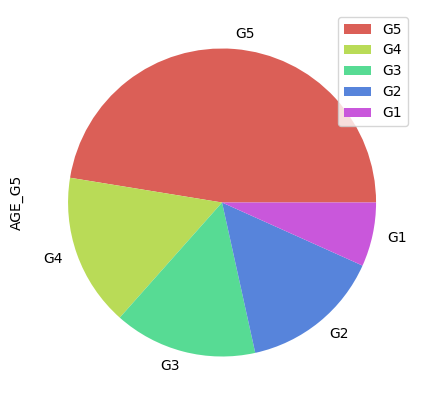

In [7]:
# 파이차트 생성
pie_df_G5.plot.pie(y='AGE_G5', figsize=(5, 5), colors=sns.color_palette('hls', len(pie_df_G5)))
plt.show()

- G5의 비중이 가장 크다는 것을 알 수 있음(절반 이상의 비율)
- G1이 가장 적은 비중
- G2~G4까지는 서로 비중을 비교하기 어려워보임
  - G1에서 G5까지 범주명 숫자가 클수록 Town 내 오래된 주택의 비율이 많음을 의미함
  - G5(Town 내 80% 이상이 1940년도 이전 건축된 건물)이 비율이 가장 크고, G1(Town 내 20% 이하가 1940년도 이전 건축된 건물)이 가장 적음

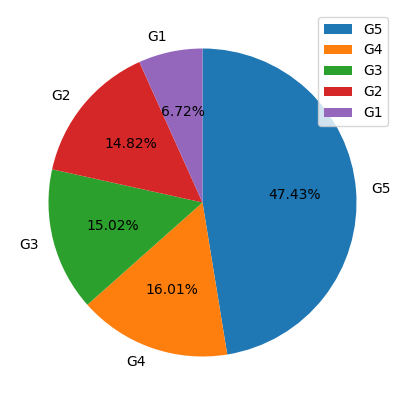

In [8]:
# matplotlib로 생성 시, 조금 더 많은 정보 및 시각화 옵션 추가 가능 (아래 코드 실행)
# 데이터 시각화 이해와 실무 강의에서 matplotlib에 대한 강의 예정

# 파이차트 생성
plt.figure(figsize=(5,5)) ## 캔버스 생성

plt.pie(pie_df_G5['AGE_G5'], ## 차트 출력
        labels=pie_df_G5.index, ## label 출력
        startangle=90, ## 시작점을 90도(degree)로 지정
        counterclock=False, ## 시계 방향
        autopct='%.2f%%', ## 퍼센티지 출력
       )
plt.legend() # legend 삽입
plt.show()

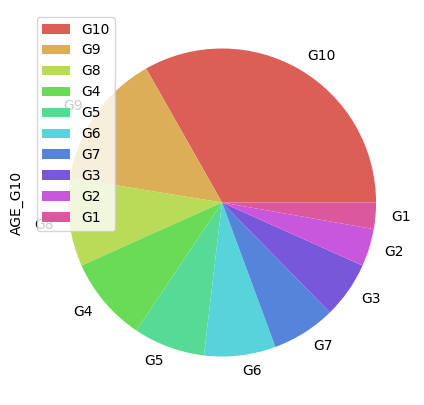

In [9]:
# 범주형 데이터를 좀 더 세분화하여 변환

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
names = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
housing_data['AGE_G10'] = pd.cut(housing_data['AGE'], bins, labels=names)

# 파이차트 생성을 위해 빈도 table 생성
pie_df_G10 = pd.DataFrame(housing_data['AGE_G10'].value_counts())

# 열 이름을 'AGE_G5'로 변경
pie_df_G10.columns = ['AGE_G10']

# 인덱스 이름 제거
pie_df_G10.index.name = None

# 파이차트 생성
pie_df_G10.plot.pie(y='AGE_G10', figsize=(5, 5), colors = sns.color_palette('hls', len(pie_df_G10)))
plt.show()

- 5개의 범주인 경우보다, 범주별 비교가 어려움을 보임
- 또한 G5~G7까지 대부분 비율이 유사하게 보이므로 비교가 쉽지 않음
- 데이터 크기가 유사할 경우, 막대그래프를 통해 크기 차이를 비교할 수 있음

### 1-2. 막대그래프(Bar plot) 실습

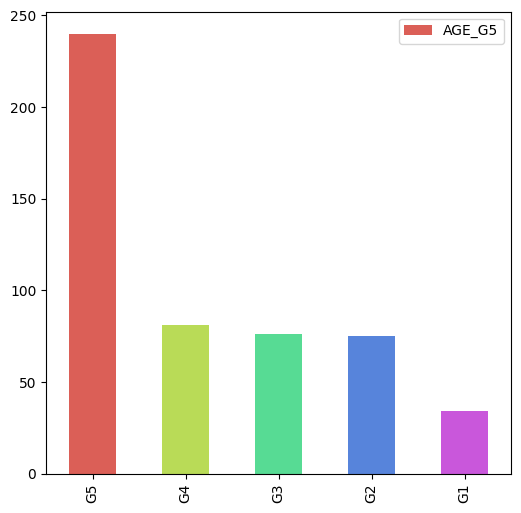

In [10]:
# 막대그래프 생성
pie_df_G5.plot.bar(y='AGE_G5', figsize=(6, 6), color = sns.color_palette('hls', len(pie_df_G5)))
plt.show()

- 파이차트 대비해 G2~G4에 대해 어느 정도 빈도 크기 비교가 수월함

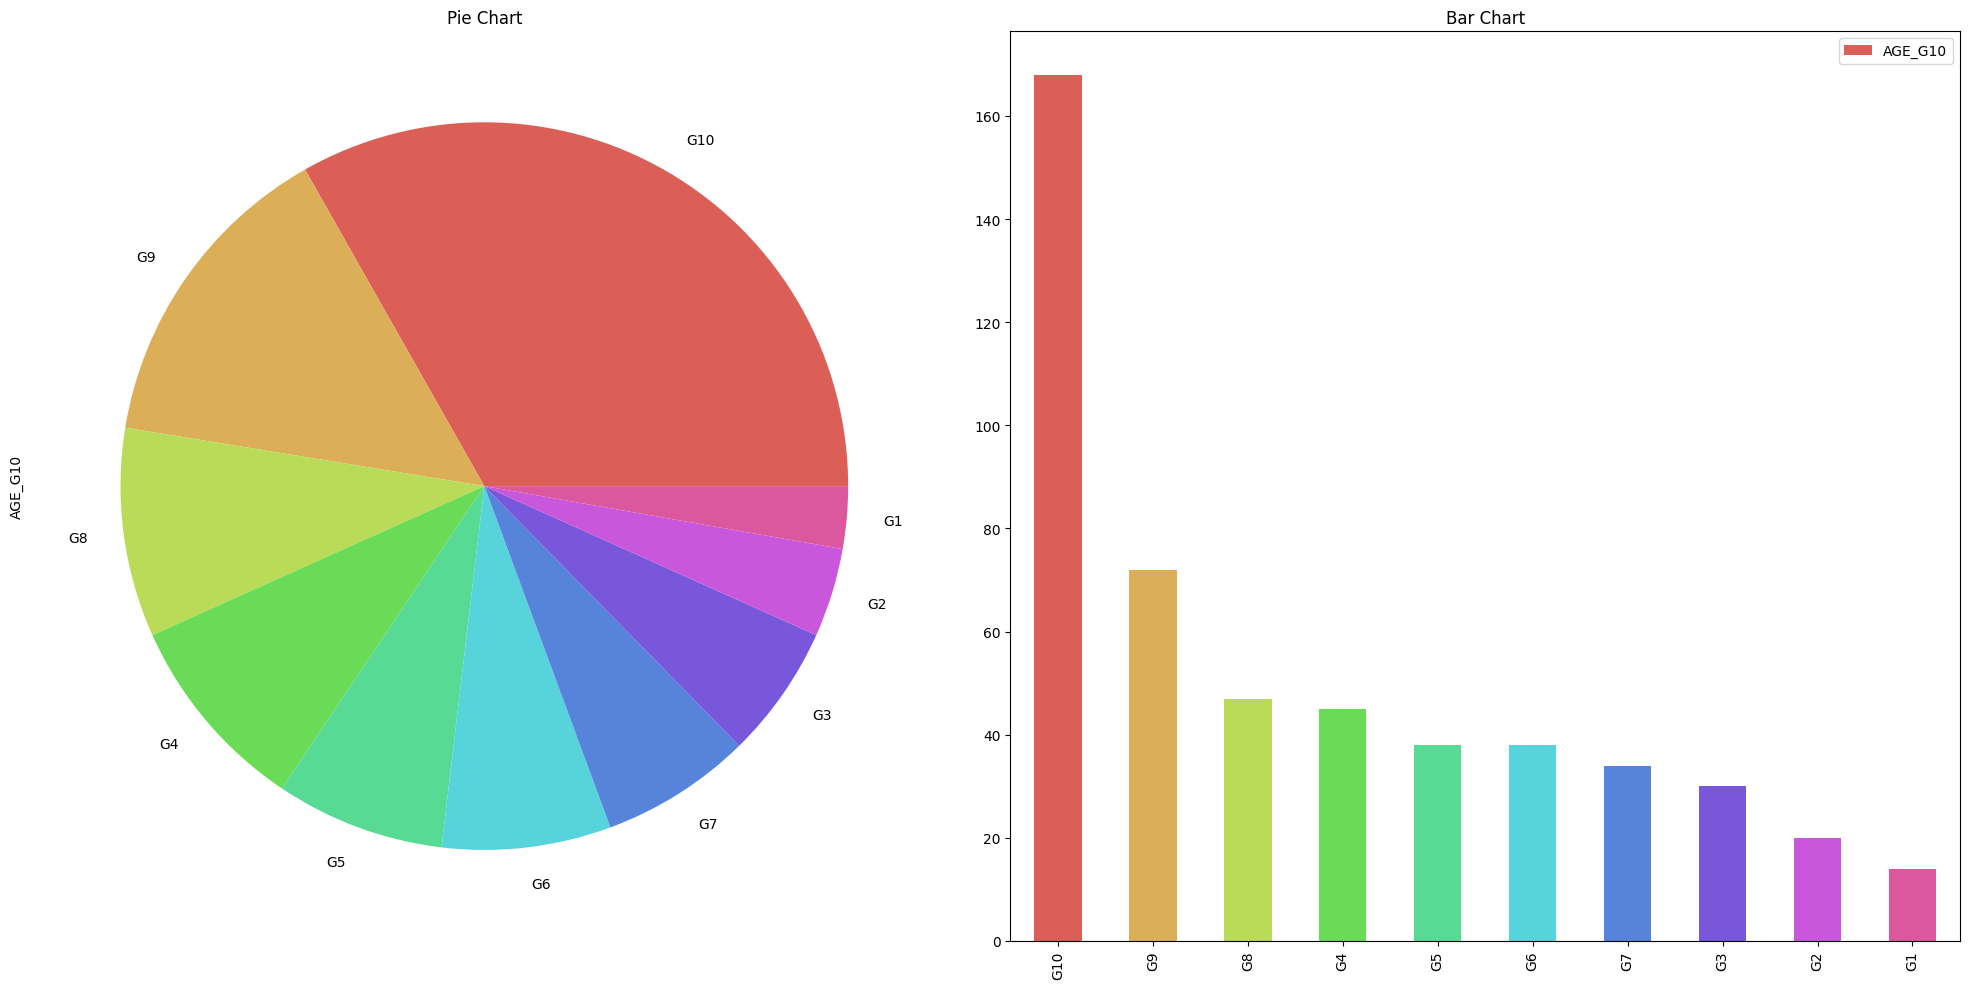

In [11]:
# 동시에 비교
# 그래프 생성
fig, ax = plt.subplots(ncols=2, figsize=(20,10))

# 색상 팔레트 설정
colors = sns.color_palette('hls', len(pie_df_G10))

# 파이 차트
pie_df_G10.plot.pie(y='AGE_G10', ax=ax[0], colors=colors, legend=False)
ax[0].set_title('Pie Chart')

# 막대 그래프
pie_df_G10.plot.bar(y='AGE_G10', ax=ax[1], color=colors)
ax[1].set_title('Bar Chart')

plt.tight_layout()  # 레이아웃 조정
plt.show()

## 2. 연속형 일변량 시각화
- 히스토그램
- 커널밀도그래프
- 박스플롯

### 2-1. 히스토그램

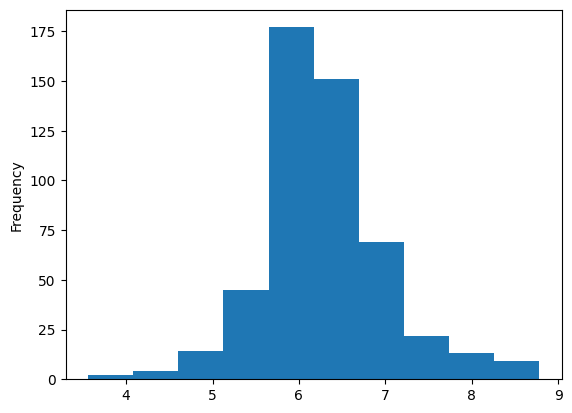

In [12]:
# 히스토그램 시각화
housing_data['RM'].plot.hist()
plt.show() # 10개 구간으로 나타남

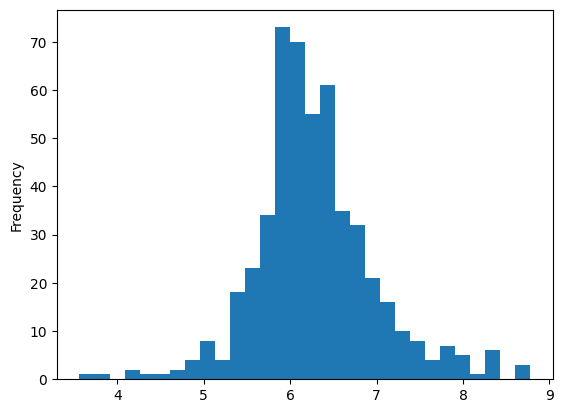

In [13]:
# 구간을 세분화하여 시각화
housing_data['RM'].plot.hist(bins = 30)
plt.show()

- 막대그래프와 유사한 모양을 지니고 있지만 사용 목적과 그래프의 형태의 차이를 보임
- 연속형인 RM(평균 방 개수) 변수의 분포를 세분화하여 구간으로 표현

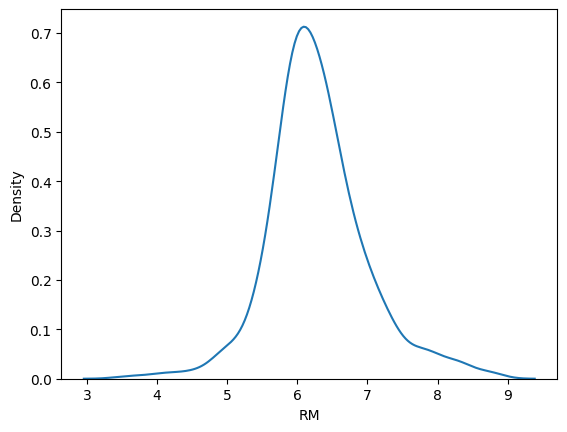

In [14]:
# 커널밀도추정 시각화
sns.kdeplot(housing_data['RM'])
plt.show()

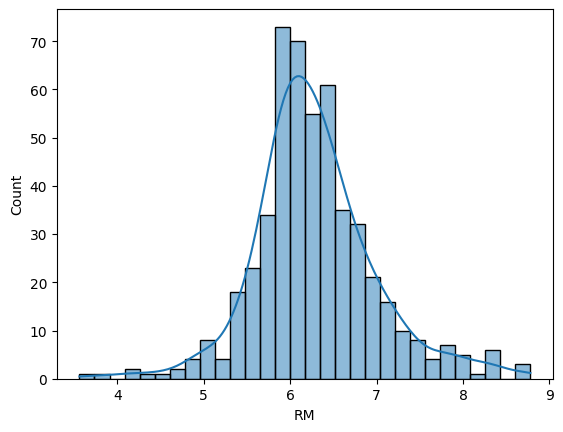

In [15]:
# 히스토그램 및 kde 함께 시각화
# seaborn 시각화 활용
sns.histplot(housing_data['RM'], bins = 30, kde = True)
plt.show()

- 관측된 RM 변수를 기반으로 커널밀도추정 결과의 시각화
- 히스토그램 분포를 완만한 곡선으로 표현

### 2-2. 일변량 비시각화 교안 내용 참고
- CRIM 컬럼의 왜도 첨도 확인 결과: 왼쪽으로 치우쳐 있고 뾰족한 모양의 분포를 지닌 변수임을 확인
   - skewness: 5.22
   - kurtosis: 37.13

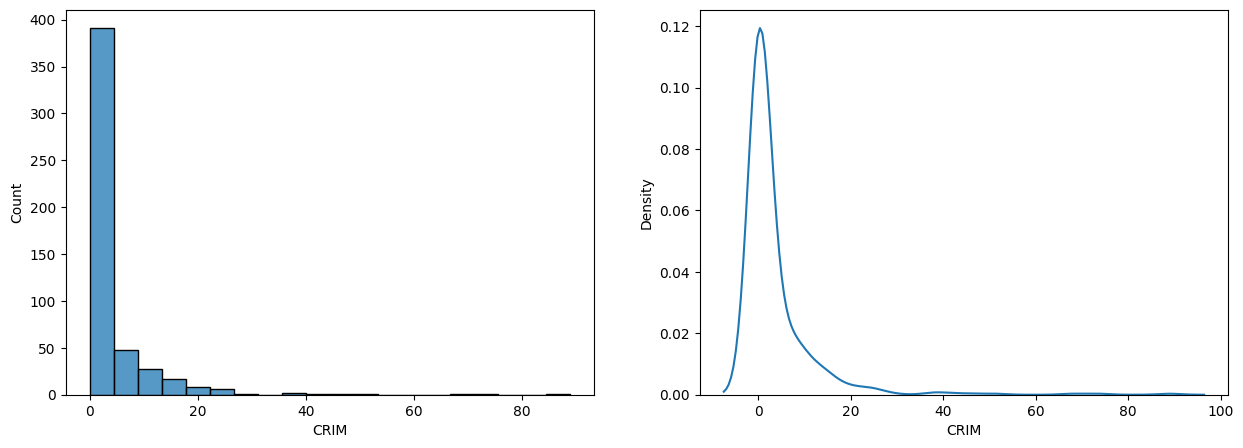

In [16]:
# CRIM 변수 시각화
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.histplot(housing_data['CRIM'], bins = 20, ax=ax[0])
sns.kdeplot(housing_data['CRIM'], ax=ax[1])

plt.show()

- 왜도 및 첨도 값으로 파악하여 데이터 분포 모양을 확인하는 비시각화 방안
- 시각화를 통하여 실제 데이터의 분포 형상 파악
- 즉, 시각화를 통해 더 빠르게 데이터 분포 및 모양 등의 정보를 빠르게 파악 가능

### 2-3. Box plot 시각화

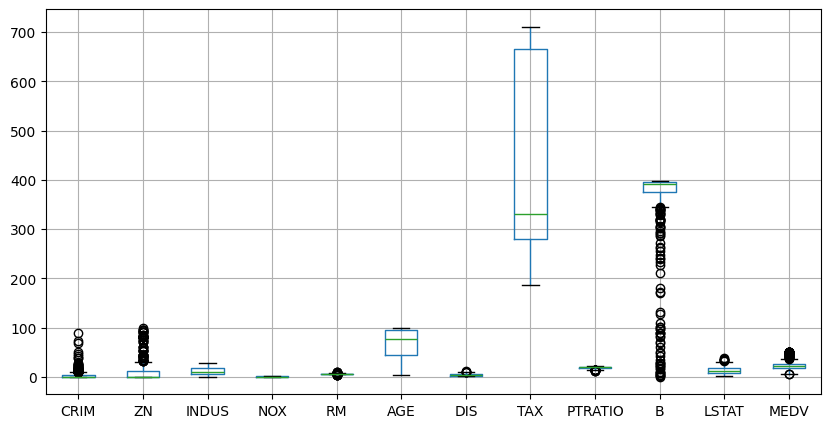

In [17]:
housing_data.boxplot(figsize=(10, 5))
plt.show()

- 변수별 관측치 범위가 모두 다르기 때문에, 개략적 파악 가능
- 개별 변수별 Box plot 시각화 필요

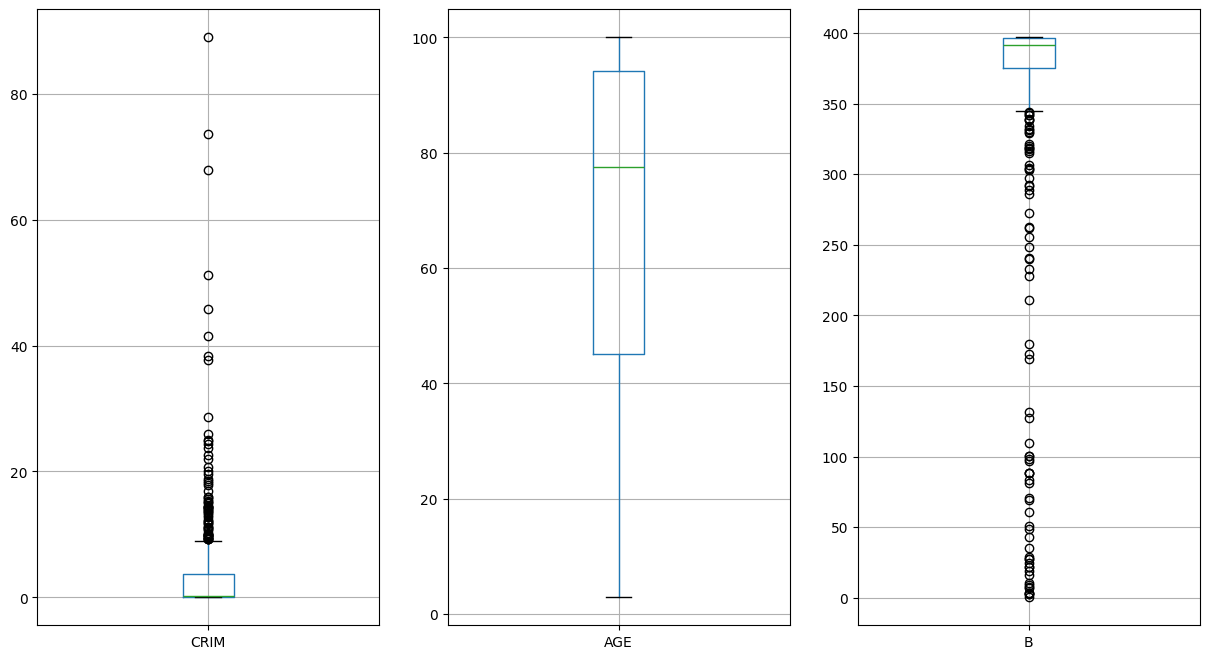

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


In [18]:
# 개별 변수별 시각화
fig, ax = plt.subplots(ncols = 3, figsize = (15, 8))

housing_data[['CRIM']].boxplot(ax=ax[0])
housing_data[['AGE']].boxplot(ax=ax[1])
housing_data[['B']].boxplot(ax=ax[2])

plt.show()

print(housing_data['AGE'].describe())

- AGE 변수를 제외하고는 남은 두 변수에 대해서는 이상치가 좀 존재하는 것처럼 보인다.
- 박스플롯 시각화를 기반으로 중앙값을 비롯한 사분위수 및 이상치 확인에 용이
- AGE 변수의 경우 IQR 기반의 이상치로 판단된 데이터 없음(관측치 최대값: 100, 최소값: 2.90)

In [22]:
q1 = housing_data['AGE'].quantile(0.25)
q3 = housing_data['AGE'].quantile(0.75)
iqr = q3 - q1
print('mininum: ', q1-1.5*iqr)
print('maximum: ', q3+1.5*iqr)

mininum:  -28.54999999999999
maximum:  167.64999999999998


- min 값이랑 max값을 앞서 확인했었는데,
- iqr을 확인해보니 이 범위 내에 모두 포함되는 것을 알 수 있다.